# HR Analytics - with imbalanced datasets

### predict whether the Employee of an Orgnaization should get Promotion or Not?

##### import all the required libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### reading the data sets 

### train_datasets

In [2]:
train=pd.read_csv("train_lZDllcl.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### testdatas sets

In [3]:
test=pd.read_csv("test_2umaH9m.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### lets check the shape of the  train and test  datasets

In [4]:
print(f"shape of train  :{train.shape}")
print(f"shape of test: {test.shape}")

shape of train  :(54808, 14)
shape of test: (23490, 13)


In [5]:
train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:>

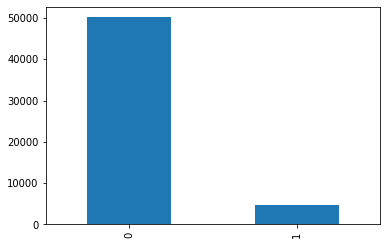

In [6]:
train["is_promoted"].value_counts().plot(kind="bar")

### Descriptive Statistics

In [7]:
# for numerical columns
train.describe().style.background_gradient(cmap="copper")

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
# descriptive statistics for categorical columns 
train.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


### Handling  Duplicates

In [10]:
duplicates_train= train[train.duplicated(keep="last")]
print(duplicates_train)

Empty DataFrame
Columns: [employee_id, department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score, is_promoted]
Index: []


In [11]:
duplicates_test= test[test.duplicated(keep="last")]
print(duplicates_test)

Empty DataFrame
Columns: [employee_id, department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score]
Index: []


### checking Missing Values for both the data sets  

In [12]:
train.isnull().sum() # train data

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

###  lets impute the missing values in the Training and Testing  Data 

In [14]:
# training data 
train["education"].fillna(train["education"].mode()[0],inplace=True)

train["education"].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:

train["previous_year_rating"].fillna(train["previous_year_rating"].mode()[0],inplace=True)
train["previous_year_rating"].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [16]:
# training data 
test["education"].fillna(test["education"].mode()[0],inplace=True)

test["education"].value_counts()

Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [17]:

test["previous_year_rating"].fillna(test["previous_year_rating"].mode()[0],inplace=True)
test["previous_year_rating"].value_counts()

3.0    9733
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

### Univariate Analysis

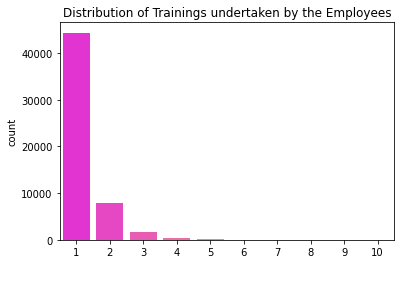

In [18]:
# lets check the distribution of trainings undertaken by the emplyoes
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

The abov Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

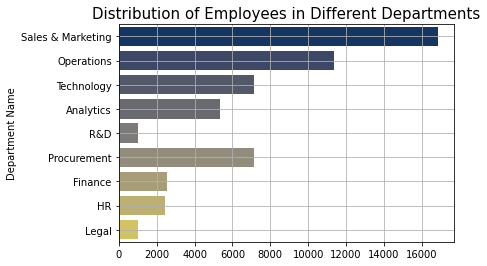

In [19]:

# lets check different departments 
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

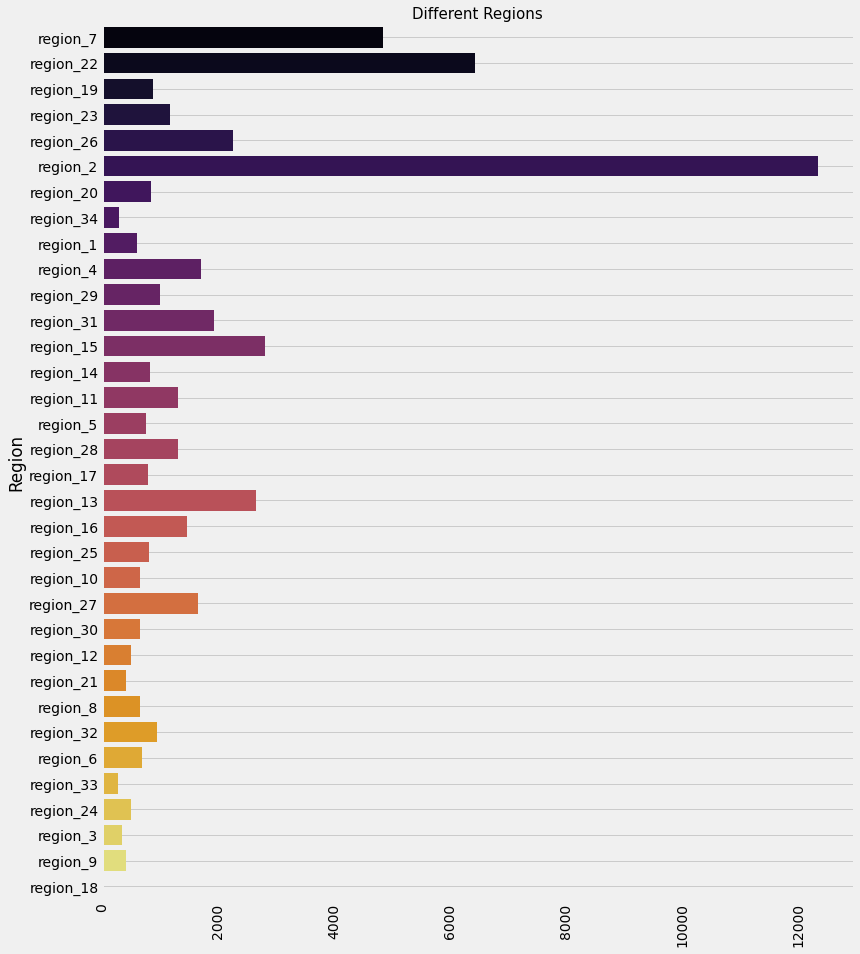

In [20]:
# lets check distribution of different Regions
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

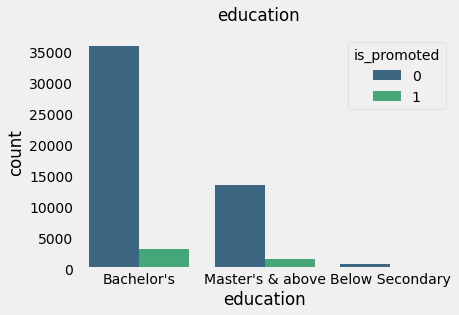

In [21]:
# education
plt.figure(figsize=(6,4))
sns.countplot(x="education",data=train,palette="viridis",hue="is_promoted",order=train["education"].value_counts().index)
plt.suptitle("education")
plt.grid(False)
plt.show()

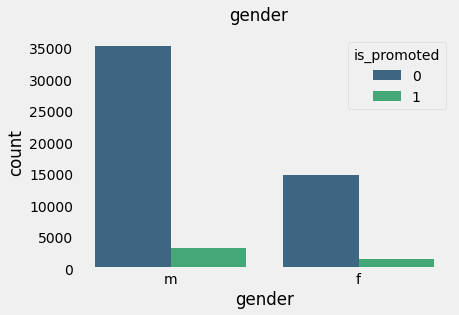

In [22]:
# gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender",data=train,palette="viridis",hue="is_promoted",order=train["gender"].value_counts().index)
plt.suptitle("gender")
plt.grid(False)
plt.show()

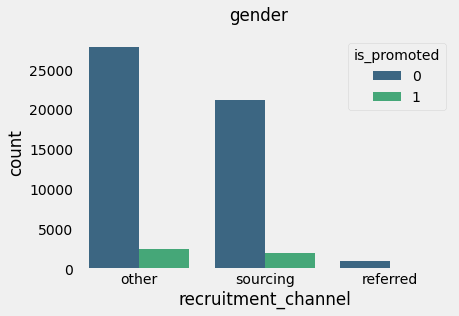

In [23]:
# recruitment_channel
plt.figure(figsize=(6,4))
sns.countplot(x="recruitment_channel",data=train,palette="viridis",hue="is_promoted",order=train["recruitment_channel"].value_counts().index)
plt.suptitle("gender")
plt.grid(False)
plt.show()

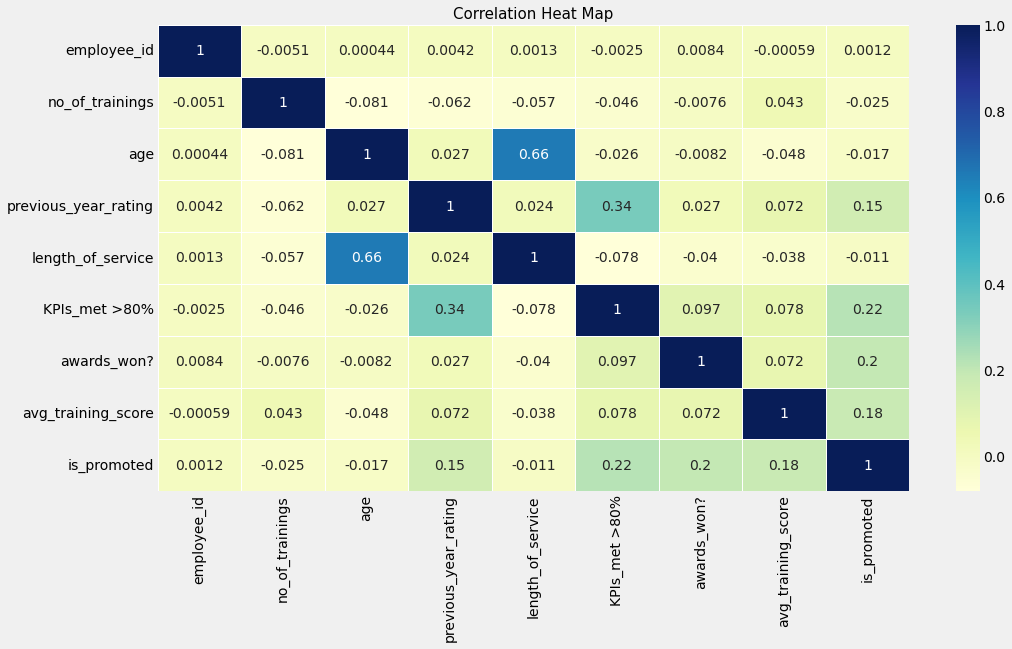

In [24]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'YlGnBu')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

### checking the Outliears 

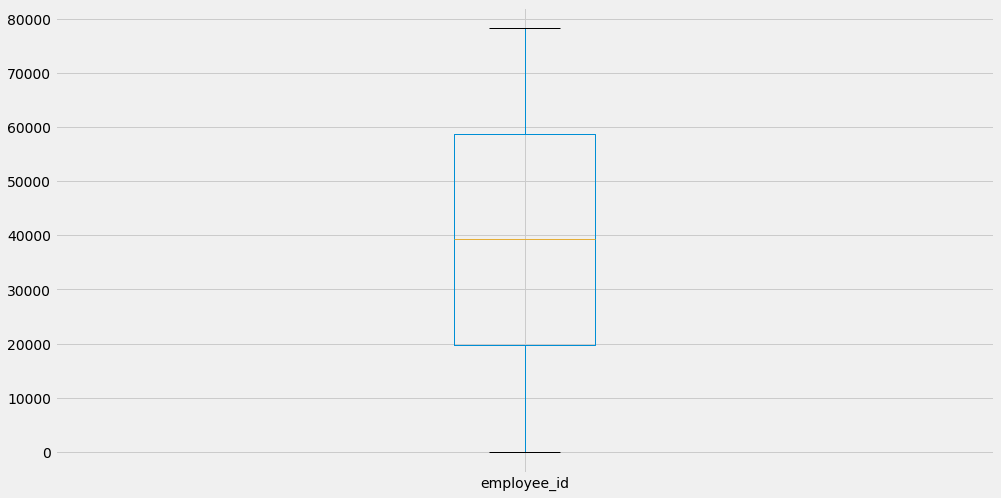

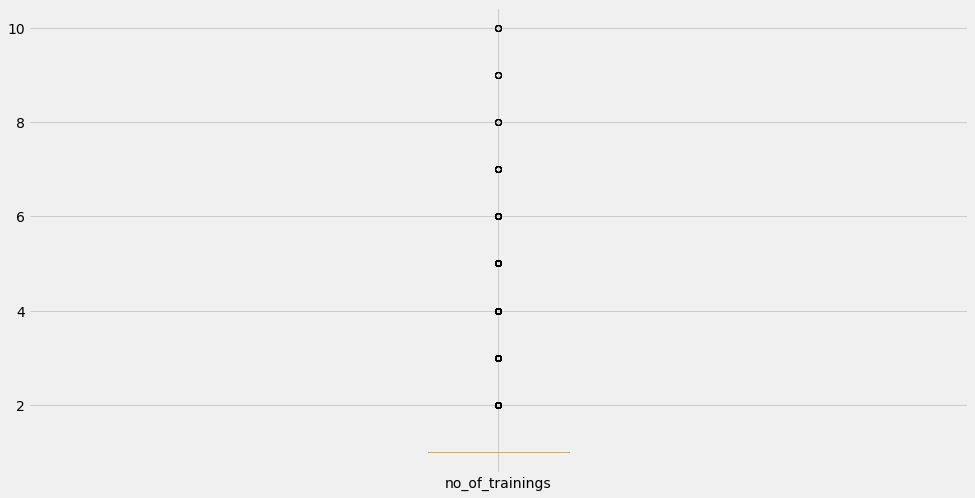

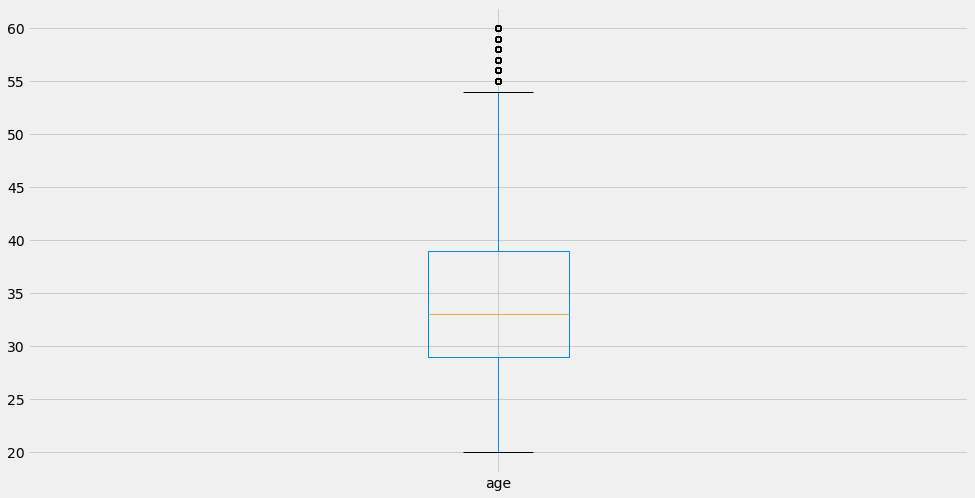

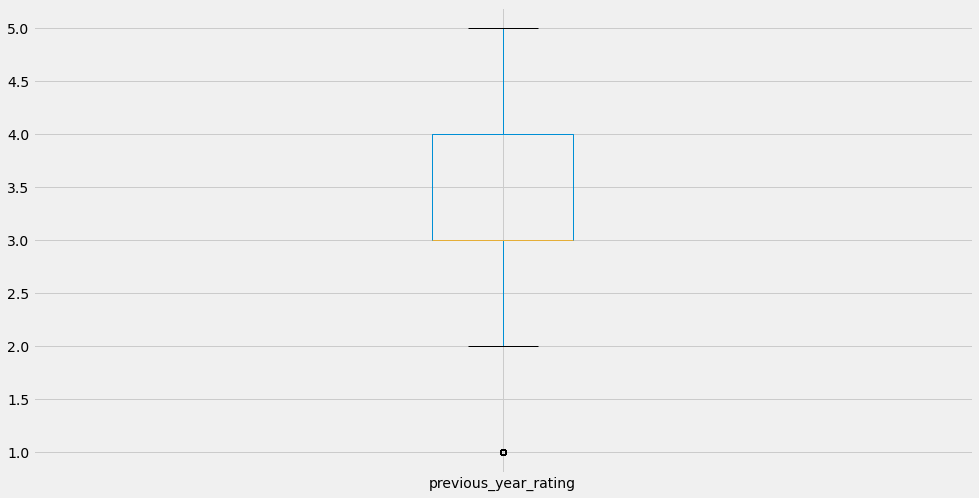

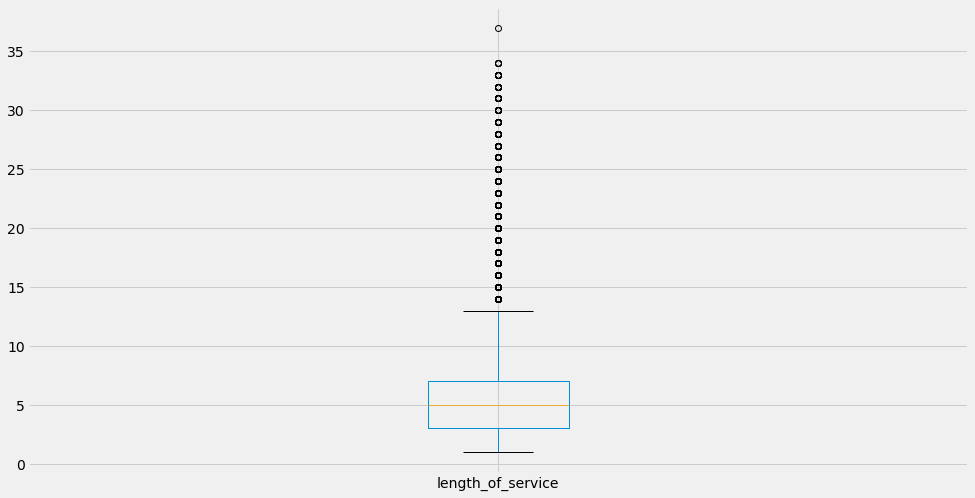

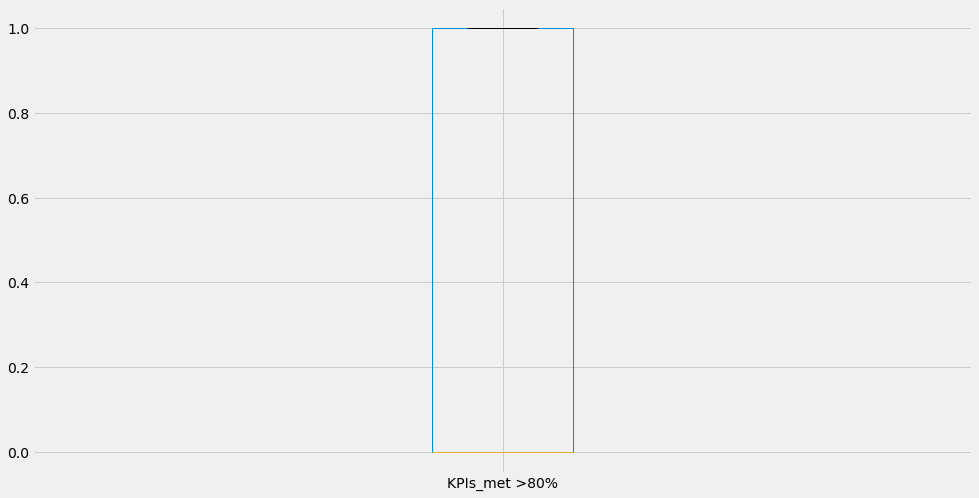

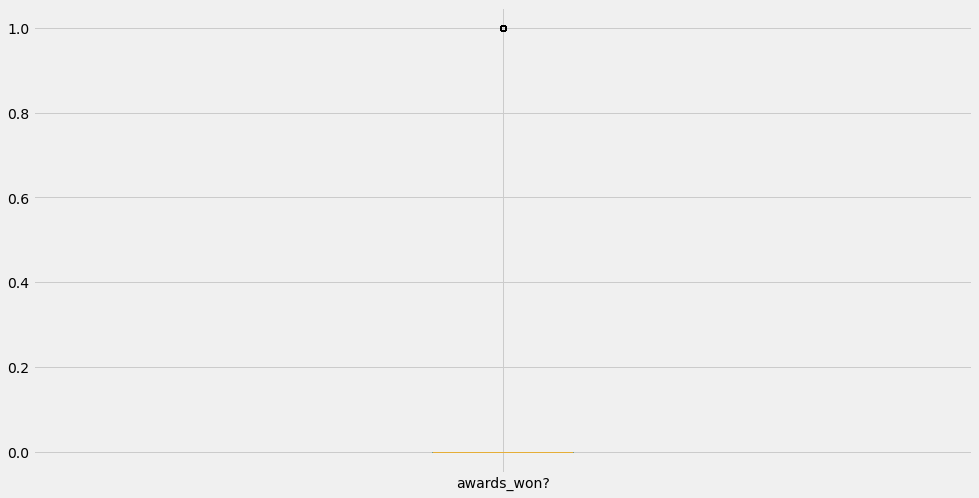

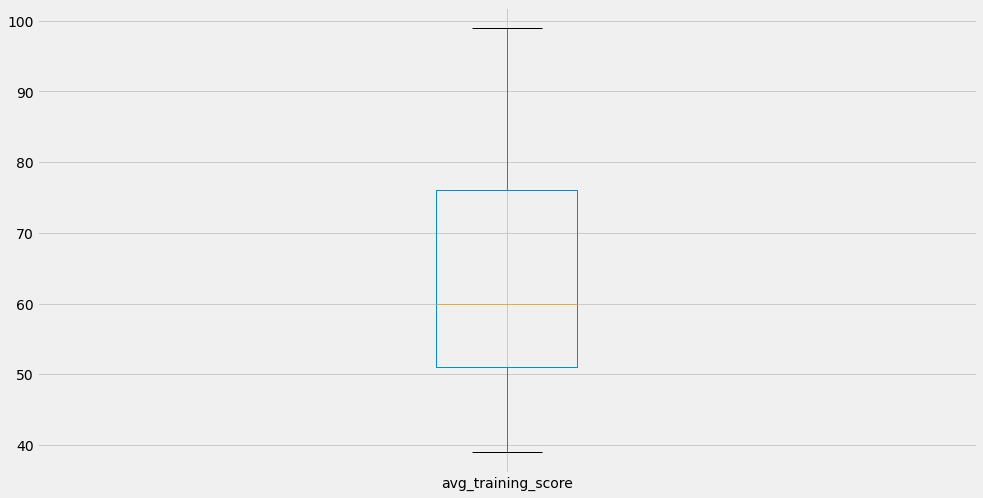

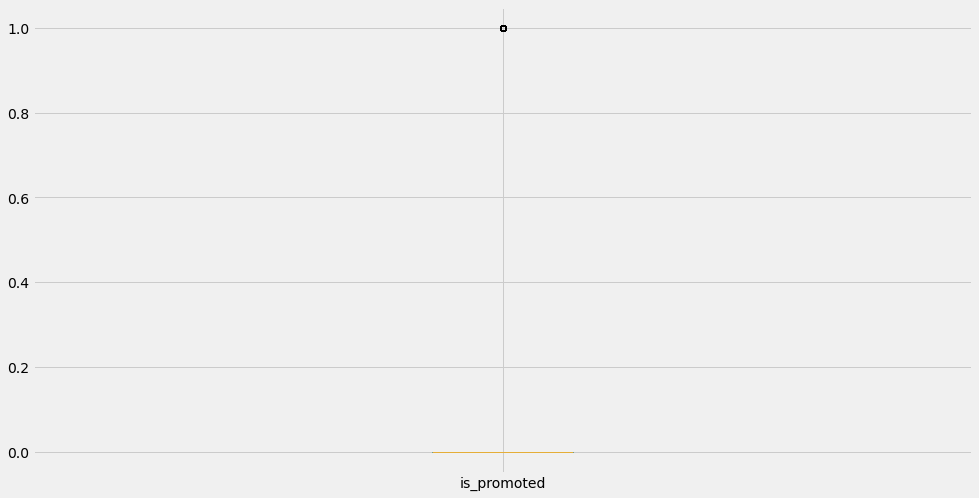

In [25]:


for x in train.columns:
    if train[x].dtypes!="O":
        train.boxplot(column=x)
        plt.show()

### Dealing with categorical Columns  

In [26]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [27]:
gender={"f":0,"m":1}
train["gender"]=train.gender.map(gender)
test["gender"]=test.gender.map(gender)

print("train")
print(train["gender"].unique())

print("test")
print(test["gender"].unique())

train
[0 1]
test
[1 0]


In [28]:
education={"Master's & above":3,"Bachelor's":2,'Below Secondary':1}
train["education"]=train.education.map(education)
test["education"]=test.education.map(education)

print("train")
print(train["education"].unique())

print("test")
print(test["education"].unique())

train
[3 2 1]
test
[2 3 1]


In [29]:
recuitment={'sourcing':2, 'other':1, 'referred':3}
train['recruitment_channel']=train.recruitment_channel.map(recuitment)
test['recruitment_channel']=test.recruitment_channel.map(recuitment)

print("train")
print(train['recruitment_channel'].unique())

print("test")
print(test['recruitment_channel'].unique())


train
[2 1 3]
test
[2 1 3]


### let us use label Encding for department and region

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# train
train["department"]=le.fit_transform(train["department"])
train["region"]=le.fit_transform(train["region"])

# test
test["department"]=le.fit_transform(test["department"])
test["region"]=le.fit_transform(test["region"])



### lets check  the data after encoding 

In [31]:
#train
train.dtypes

employee_id               int64
department                int32
region                    int32
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [32]:
# test
test.dtypes

employee_id               int64
department                int32
region                    int32
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [33]:
# train
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [34]:
# test
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Creating  X and Y 

In [35]:
# lets split the target data from the train data

X=train.drop(["is_promoted"],axis=1)
Y=train["is_promoted"]
testRaw=test.copy()

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", Y.shape)
print("Shape of the TestRaw :", testRaw.shape)

Shape of the x : (54808, 13)
Shape of the y : (54808,)
Shape of the TestRaw : (23490, 13)


# Resampling 

It is very important to resample the data, as the Target class is Highly imbalanced.

Here We are going to use Over Sampling Technique to resample the data.
 
 lets import the SMOTE algorithm to do the same.

In [36]:
!pip install imbalanced-learn==0.6.0

In [37]:
from imblearn.over_sampling import SMOTE


In [38]:
X_resample,Y_resample = SMOTE().fit_sample(X,Y.values.ravel())
# lets print the shape of x and y after resampling it
print(X_resample.shape)
print(Y_resample.shape)

(100280, 13)
(100280,)


### before Resampleing

In [39]:
 #lets also check the value counts of our target variable4

print("Before Resampling :")
print(Y.value_counts())



Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64


### lets create a validation set from the training data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resample,Y_resample,test_size=0.3,random_state=10)

In [42]:
print(f"X_train-shape:{X_train.shape}")
print(f"Y_train-shape :{Y_train.shape}")
print(f"X_test-shape:{X_test.shape}")
print(f"Y_test-shape:{Y_test.shape}")

X_train-shape:(70196, 13)
Y_train-shape :(70196,)
X_test-shape:(30084, 13)
Y_test-shape:(30084,)


### Future Scaleing 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X_train=scaler1.fit_transform(X_train)
X_test=scaler1.transform(X_test)
testRaw=scaler1.transform(testRaw)


## Machine Learning Predicitve Modelling 

# LogisticRegression

In [44]:
X_train.shape

(70196, 13)

In [45]:
Y_train.shape

(70196,)

In [46]:
from sklearn.linear_model import LogisticRegression
# create model
classifier= LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(Y_pred)

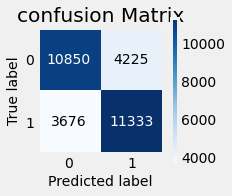

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.73     15075
           1       0.73      0.76      0.74     15009

    accuracy                           0.74     30084
   macro avg       0.74      0.74      0.74     30084
weighted avg       0.74      0.74      0.74     30084

Accuracy of the model:  0.7373687009706156


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [48]:
print("Training Accuracy :", classifier.score(X_train, Y_train))
print("Testing Accuracy :", classifier.score(X_test,Y_test))

Training Accuracy : 0.7340019374323323
Testing Accuracy : 0.7373687009706156


# using cross_validation

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
classifier= LogisticRegression()
scores=cross_val_score(classifier,X_train,Y_train,cv=skfold)
print(scores)

[0.73311966 0.72925422 0.7365197  0.73466771 0.73381295]


In [69]:
print(np.mean(scores))

0.7334748469312896


#### i am not using  this because  it take HUGE TIME 

In [ ]:
for train_index, test_index in skfold.split(X_train, Y_train):
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = Y_train[train_index], Y_train[test_index]
    classifier.fit(X_train1, y_train1)
    Y_pred = classifier.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(y_test1,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(y_test1,Y_pred))

acc=accuracy_score(y_test1, Y_pred)
print("Accuracy of the model: ",acc)

### Decision tree Classifier 

In [49]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [50]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


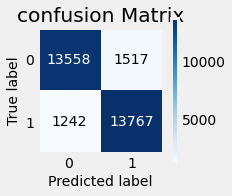

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     15075
           1       0.90      0.92      0.91     15009

    accuracy                           0.91     30084
   macro avg       0.91      0.91      0.91     30084
weighted avg       0.91      0.91      0.91     30084

Accuracy of the model:  0.9082901209945486


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

In [52]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test,Y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9082901209945486


# GridSearch CV 

In [53]:
criterion = ["gini", "entropy"]
max_features=["auto","sqrt","log2"]
max_depth=[2,4,5]
min_samples_split=[2,3]
min_samples_leaf=[1,2,5]

# create the  parameter

parameter={'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(parameter)

{'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 5]}


In [54]:
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
Grid=GridSearchCV(estimator=DT,param_grid=parameter,cv=10,n_jobs=-1)

Grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [55]:
Grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [56]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier(criterion="gini",random_state=10,max_depth=5,min_samples_leaf=2,min_samples_split=3,max_features="log2")

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

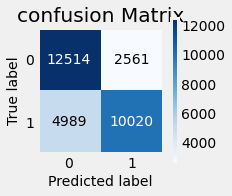

Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77     15075
           1       0.80      0.67      0.73     15009

    accuracy                           0.75     30084
   macro avg       0.76      0.75      0.75     30084
weighted avg       0.76      0.75      0.75     30084

Accuracy of the model:  0.7490360324424944


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

In [58]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test,Y_test))

Training Accuracy : 0.7540743062282751
Testing Accuracy : 0.7490360324424944


# Random Forest 

In [59]:
from  sklearn.ensemble import  RandomForestClassifier
RT= RandomForestClassifier()
RT.fit(X_train,Y_train)
Y_pred=RT.predict(X_test)

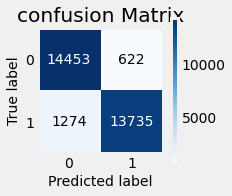

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15075
           1       0.96      0.92      0.94     15009

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

Accuracy of the model:  0.9369764658954927


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [61]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test,Y_test))

Training Accuracy : 0.7540743062282751
Testing Accuracy : 0.7490360324424944


# Random classifier with GridSerch CV

In [ ]:
criterion = ["gini", "entropy"]
max_features=["auto","sqrt","log2"]
max_depth=[2,4,5]
min_samples_split=[2,3]
min_samples_leaf=[1,2,5]

# create the  parameter

parameter={'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(parameter)

In [ ]:
from sklearn.model_selection import GridSearchCV
RT=RandomForestClassifier()
Grid=GridSearchCV(estimator=RT,param_grid=parameter,cv=10,n_jobs=-1)

Grid.fit(X_train,Y_train)

In [ ]:
Grid.best_params_

In [ ]:
from  sklearn.ensemble import  RandomForestClassifier
RT= RandomForestClassifier(criterion='gini',
 max_depth=5,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,random_state=10)
RT.fit(X_train,Y_train)
Y_pred=RT.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test,Y_test))

# XGB Boost

In [62]:
from xgboost import XGBClassifier

In [63]:
model=XGBClassifier(n_estimators=100,random_state=10)
#fit the model on the data and predict the values
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

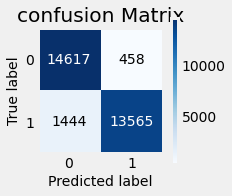

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     15075
           1       0.97      0.90      0.93     15009

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

Accuracy of the model:  0.9367770243318707


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test,Y_test))

# using cross_validation

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
XGB=XGBClassifier(n_estimators=100,random_state=10)
scores=cross_val_score(model,X_train,Y_train,cv=skfold)
print(scores)

[0.93532764 0.9345395  0.93275874 0.93418335 0.92691787]


In [66]:
print(np.mean(scores))

0.9327454187957074


### we got best accuracy in  XGBOOST

In [67]:
model=XGBClassifier(n_estimators=100,random_state=10)
#fit the model on the data and predict the values
model.fit(X_train,Y_train)
Y_pred=model.predict(testRaw)

In [73]:


 counttest=pd.read_csv("test_2umaH9m.csv")
test["Pred"]=Y_pred
test['Pred']=test['Pred'].map({0:"not promoted",1:"promoted"})
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Pred
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,not promoted
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,not promoted
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,not promoted
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,not promoted
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,not promoted
